In [37]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [38]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [39]:
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0 # 입력 이미지는 항상 깊이(채널) 차원이 있어야함
# 전체 배열 차원은 그대로 유지하면서 마지막에 차원 추가

In [40]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target)

In [41]:
model = keras.Sequential()

In [42]:
model.add(keras.layers.Conv2D(
    32, # 필터의 개수, 랜덤으로 넣음
    kernel_size=3,# 3*3
    activation='relu',
    padding='same',
    input_shape=(28, 28, 1) # 사진의 크기
))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.add(keras.layers.MaxPooling2D(2)) # 2*2를 묶어서 활성화가 가장 많이 된

In [44]:
model.add(keras.layers.Conv2D(
    64,
    kernel_size=3,
    activation='relu',
    padding='same'
))
model.add(keras.layers.MaxPooling2D(2))

In [45]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4)) # 특성의 40%를 제외, 은닉층의 과대적합을 막아줌
model.add(keras.layers.Dense(10, activation='softmax'))

In [46]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │         313,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # 학습 방향제시
es = keras.callbacks.EarlyStopping(patience=2)
result = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[es])

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 77s 53ms/step - accuracy: 0.7308 - loss: 0.7555 - val_accuracy: 0.8717 - val_loss: 0.3545
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 79s 51ms/step - accuracy: 0.8636 - loss: 0.3844 - val_accuracy: 0.8910 - val_loss: 0.2975
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 50ms/step - accuracy: 0.8859 - loss: 0.3230 - val_accuracy: 0.8996 - val_loss: 0.2725
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 77s 47ms/step - accuracy: 0.9003 - loss: 0.2793 - val_accuracy: 0.9094 - val_loss: 0.2527
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 66s 47ms/step - accuracy: 0.9083 - loss: 0.2529 - val_accuracy: 0.9101 - val_loss: 0.2524
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 86s 50ms/step - accuracy: 0.9161 - loss: 0.2310 - val_accuracy: 0.9148 - val_loss: 0.2352
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 49ms/step - accuracy: 0.9210 - loss: 0.2164 - val_accuracy: 0.9131 - val_loss: 0.2482
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 49ms/step - accuracy: 0.9276 -

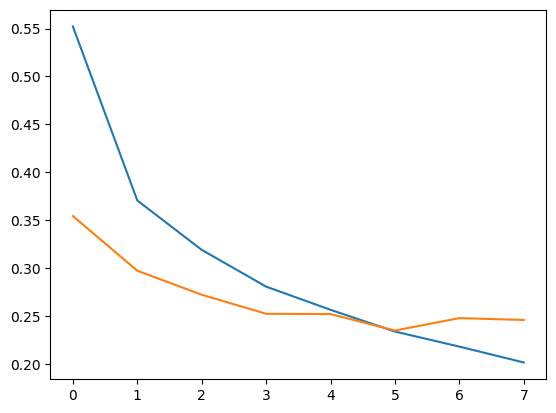

In [49]:
import matplotlib.pyplot as plt
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])

In [50]:
model.evaluate(val_scaled, val_target)

469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9099 - loss: 0.2564


[0.24623730778694153, 0.9107999801635742]

In [51]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9109 - loss: 0.2672


[0.2539125680923462, 0.9122999906539917]